In [1]:
%matplotlib inline
import torch
from torchdiffeq import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import pandas as pd
import seaborn as sns
from pyPDMP.systems import System, LinearSystem, LinearStochasticSystem

In [13]:
print('Simple test:')
t = torch.linspace(0, 0.001, 2)
x0 = torch.rand(4)
m = LinearSystem(k=2, b=2)
sol = odeint(m, x0, t)
#print(sol)
m = LinearStochasticSystem(k=2, b=2, lambd=0.4, mu_jump=0.3, std_jump=0.3, std_s=5)
x0 = torch.rand(4)


traj = []
for i in range(2000):
    sol = odeint(m, x0, t)
    traj.append(sol[-1])
    x0 = sol[-1]
print(sol)

Simple test:
tensor([[ 0.0451,  0.0529, -0.0796, -0.1773],
        [ 0.0450,  0.0527, -0.0795, -0.1771]])


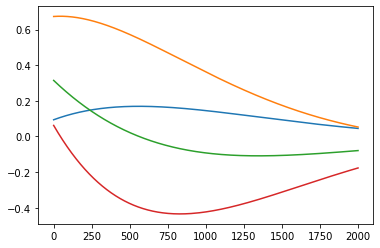

In [35]:
for j in range(x0.size(0)):
    plt.plot([traj[i][j] for i in range(len(traj))])

In [36]:
m.log

[[tensor(0.),
  tensor([0.0933, 0.6734, 0.3153, 0.0632]),
  tensor([-1.8448,  1.7630,  0.9477, -2.6209])],
 [tensor(3.4623e-06),
  tensor([0.0933, 0.6734, 0.3153, 0.0632]),
  tensor([-1.7167, -0.0600, -2.3094,  0.9434])],
 [tensor(9.8823e-06),
  tensor([0.0933, 0.6733, 0.3153, 0.0633]),
  tensor([-1.4935,  2.0404, -0.4369,  4.1435])],
 [tensor(3.3427e-06),
  tensor([0.0933, 0.6733, 0.3153, 0.0633]),
  tensor([-2.3131,  1.0268, -1.8615,  1.9120])],
 [tensor(3.1610e-07),
  tensor([0.0933, 0.6734, 0.3153, 0.0632]),
  tensor([2.6016, 1.7992, 2.6009, 0.9812])],
 [tensor(1.5805e-06),
  tensor([0.0932, 0.6733, 0.3154, 0.0633]),
  tensor([2.8621, 0.9881, 4.1287, 4.3673])],
 [tensor(5.7588e-07),
  tensor([0.0933, 0.6734, 0.3153, 0.0632]),
  tensor([-0.8374,  3.3958,  0.9340,  0.0735])],
 [tensor(7.1986e-07),
  tensor([0.0933, 0.6734, 0.3153, 0.0632]),
  tensor([-0.5285,  2.1751,  0.2273, -0.7184])],
 [tensor(2.5092e-06),
  tensor([0.0933, 0.6734, 0.3153, 0.0632]),
  tensor([-5.0535,  2.8264,  2